# Exercise: Polynomial regression

In this exercise we train polynomial regressors. Given data $(x_1,y_1),\ldots, (x_n,y_n)$ we search for polynomial regressors $f$ such that $$\sum_{i=1} (y_i-f(x_i))^2$$ becomes small.

First we do some of the necessary imports.

In [1]:
import numpy as np  # for general scientific computing
import matplotlib.pyplot as plt # plotting
import sklearn.linear_model # linear regression
import sklearn.preprocessing # for polynomial regression (see below)

We generate a small training and test set. Both sets come from the quadratic function $1.5x^2-2x+1$, with a little bit of random noise added. To illustrate both sets we plot them, as well as the quadratic function.

You do not need to understand the code below in full detail. There is just one detail I'd like to point out. The estimators of *scikit learn* expect the training set to have a particular format: a list (or rather an array) of (multidimensional) data vectors. Because of that the estimators will raise an error if the training set is 1-dimensional. Consequently, we need to <code>reshape</code> the data. That is, we turn 1-dimensional data into 2-dimensional data. Let me demonstrate.

In [2]:
one_dim=np.array([1.,2.,42.])
one_dim

array([ 1.,  2., 42.])

In [3]:
one_dim.reshape(-1,1)

array([[ 1.],
       [ 2.],
       [42.]])

Now let's generate the training set consisting of data <code>x_train</code> and target values <code>y_train</code>, and the test set consisting of <code>x_test</code> and <code>y_test</code>.

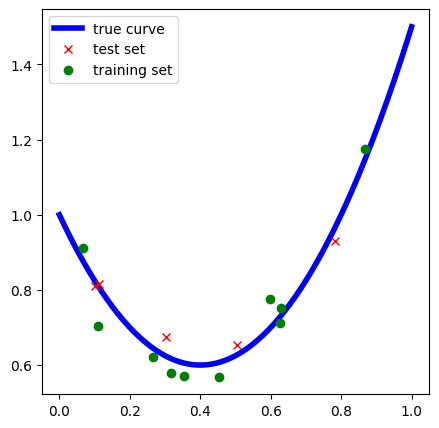

In [4]:
def true_function(x):
    return 2.5*x**2-2*x+1

def draw_points(number):
    np.random.seed(42*number)
    x = np.random.random(number)
    noise = np.random.normal(scale=0.05,size=number)
    y = true_function(x) + noise
    return x.reshape(-1,1),y # x reshaped because training set cannot be 1-dim

training_size = 10
x_train,y_train=draw_points(training_size)

test_size = 5
x_test,y_test = draw_points(test_size)

xx=np.linspace(0,1,200)
yy_true=true_function(xx)
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(xx,yy_true,"b-",label="true curve",linewidth=4)
ax.plot(x_test.flat,y_test,"rx",label="test set")
ax.plot(x_train.flat,y_train,"go",label="training set")
ax.legend()
plt.show()

Next, we train a linear regression. For this, we first instantiate a <code>LinearRegression</code> object, which we find in the package <code>sklearn.linear_model</code>. Then it needs to be trained. All classifiers and regressors in *scikit learn* have a method <code>fit</code> for this.

In [5]:
lin_reg=sklearn.linear_model.LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

Once trained, we can <code>predict</code> new values. The method <code>predict</code> expects the $x$-values in the same format as the training set, ie, a list of(multidimensional) data points. That means, even, if you just need the prediction for a single data point, you need to wrap it in square brackets: <code>estimator.predict([single_x])</code>.

Because we have 1-dimensional $x$ we even need to put the data into two square brackets. Let's predict two values.

In [6]:
lin_reg.predict([[1],[2]])

array([0.92269465, 1.2482328 ])

Linear regression is not very interesting. Let's do quadratic regression. We already know that quadratic regression is just linear regression with a modified training set. In *scikit learn* we can easily compute features of any degree with <code>PolynomialFeatures</code>. In the same way that estimators need to be fit first, this is also the case for <code>PolynomialFeatures</code>. <code>fit</code> does not do much here: It simply memorises the dimension of the data. Instead of a <code>predict</code> method, we have here a <code>transform</code> method. Let's have a look.

In [7]:
quad_features=sklearn.preprocessing.PolynomialFeatures(degree=2)
x_demo=np.array([0,1,2,3]).reshape(-1,1) # reshape because estimator expects multidim training set
quad_features.fit(x_demo)
quad_features.transform(x_demo)

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

We see that the data <code>[2]</code> turns into <code>[1,2,4]</code>, ie, constant term, linear term and quadratic term, as expected.

Next, we can plug the new, transformed training set into a linear regression, and obtain a quadratic regressor.

In [8]:
reg=sklearn.linear_model.LinearRegression()
reg.fit(quad_features.transform(x_train),y_train)

LinearRegression()

What is a bit annoying: If we now want to do predictions, we first need to <code>transform</code> the $x$-values via <code>quad_features</code> and then call <code>predict</code> on <code>reg</code>:

In [9]:
reg.predict(quad_features.transform([[1],[3]]))

array([ 1.57051822, 18.39542361])

Because that is so annyoing, *scikit learn* has the class <code>Pipeline</code> that allows to chain any number of transformators and a <code>predictor</code>. Once the pipeline is defined, it can be used like a normal regressor, ie, we can call <code>fit</code> and also <code>predict</code> on it. Here's how that works.

In [33]:
import sklearn.pipeline
quad_features=sklearn.preprocessing.PolynomialFeatures(degree=2)
reg=sklearn.linear_model.LinearRegression()
### this what we want to chain:
steps=[('quadratic features',quad_features),('linear regression',reg)] # always pairs (name, estimator)
quad_pipe=sklearn.pipeline.Pipeline(steps)
quad_pipe.fit(x_train,y_train)

Pipeline(steps=[('quadratic features', PolynomialFeatures()),
                ('linear regression', LinearRegression())])

The whole pipeline is now trained and can be used for prediction.

In [34]:
quad_pipe.predict([[1],[3]])

array([ 1.57051822, 18.39542361])

### Task: Train degree 10 regressor###

In the same way as above, define a regressor of degree 10 with a pipeline and train it on the training set. The <code>Pipeline</code> object that encapsulates the regressor should be called <code>ten_pipe</code>.

In [35]:
### insert your code here ###
### end of insert ###

ten_features=sklearn.preprocessing.PolynomialFeatures(degree=10)
reg_ten=sklearn.linear_model.LinearRegression()
steps=[('10-adic features',ten_features),('linear regression',reg_ten)] # always pairs (name, estimator)
ten_pipe=sklearn.pipeline.Pipeline(steps)
ten_pipe.fit(x_train,y_train)
ten_pipe.predict([[1],[3]]) # this should run without any errors

array([-4.87928674e+03, -1.75702538e+10])

Let's plot the result. (This will not work if you messed up the regressors or if you didn't call the )

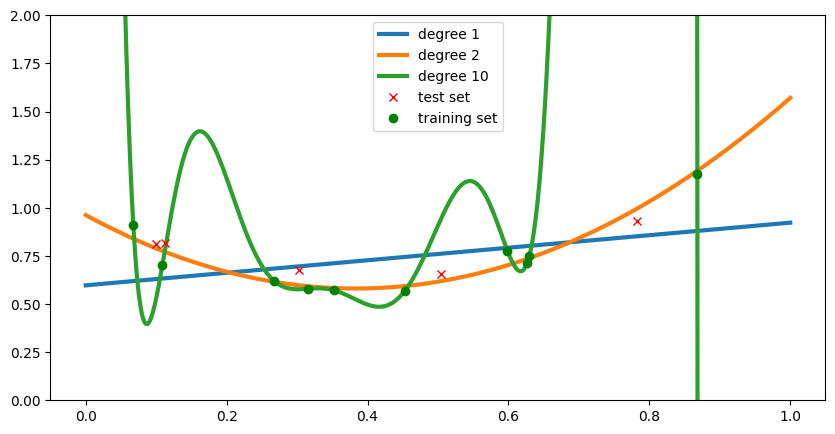

In [36]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_ylim(0,2)
xx=np.linspace(0,1,400)
estimators=[(1,lin_reg),(2,quad_pipe),(10,ten_pipe)]
estimator_degrees=[1,2,10]
for degree,estimator in estimators:
    ax.plot(xx,estimator.predict(xx.reshape(-1,1)),linewidth=3,label="degree {}".format(degree))
ax.plot(x_test.flat,y_test,"rx",label="test set")
ax.plot(x_train.flat,y_train,"go",label="training set")
ax.legend()

Next, let's compute errors. For regression, we often use the *mean square error*, or mse for friends:
$$
\text{mse}(y,y')=\frac{1}{n}\sum_{i=1}^n(y_i-y'_i)^2
$$

The mean square error is implemented as function <code>mean_squared_error</code> in package <code>sklearn.metrics</code>. Let's try it out.

In [37]:
import sklearn.metrics

mse=sklearn.metrics.mean_squared_error
y1=[1,1,1]
y2=[1.1,0.9,1.1]
mse(y1,y2)

0.010000000000000009

### Task: errors ###

Compute the training error and test error for the three regressor we've trained above. Output the errors with <code>print</code>. To print out text and variable at the same time you can do the following <code>print("this {} is the value of the variable".format(some_variable))</code>

In [48]:
### insert your code here ###
#training errors:
print(f"training error for linear regression: {mse(y_train,lin_reg.predict(x_train))}")
print(f"training error for quadratic regression: {mse(y_train,quad_pipe.predict(x_train))}")
print(f"training error for 10-adic regression: {mse(y_train,ten_pipe.predict(x_train))}")

#test errors:
print(f"test error for linear regression: {mse(y_test,lin_reg.predict(x_test))}")
print(f"test error for quadratic regression: {mse(y_test,quad_pipe.predict(x_test))}")
print(f"test error for 10-adic regression: {mse(y_test,ten_pipe.predict(x_test))}")

# out of interest: degree 9 regression also fits data perfectly, because 10 points always define a degree 9 polynomial
nine_features=sklearn.preprocessing.PolynomialFeatures(degree=9)
reg_nine=sklearn.linear_model.LinearRegression()
steps=[('10-adic features',nine_features),('linear regression',reg_nine)] # always pairs (name, estimator)
nine_pipe=sklearn.pipeline.Pipeline(steps)
nine_pipe.fit(x_train,y_train)
print(f"\ntraining error for 9-adic regression: {mse(y_train,ten_pipe.predict(x_train))}")


training error for linear regression: 0.025749152622868653
training error for quadratic regression: 0.0017978010868627888
training error for 10-adic regression: 4.394407192740702e-21
test error for linear regression: 0.016783289005474343
test error for quadratic regression: 0.002812534657437764
test error for 10-adic regression: 677.3621161359528

training error for 9-adic regression: 4.394407192740702e-21


### Task: interpretation ###

Interpret the results, give an explanation for the training and test errors (at most three sentences).

Write your answer here:




### training errors
Linear training error is the largest, because the data is randomly generated along a parabola. Degree 2 is improved, the remaining training error is a result of the added noise. Since 10 points can be fitted perfectly with a degree 10 polynomial, its training error is (basically) zero.
### test errors
The linear case is pretty much the same as above. Quadratic still works well, because the points are randomly generated along a parabola. The 10th degreee predictor is helplessly overfitted and has only the ten training points in common with the parabola resulting in the highest test error.
